In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.TotalCharges.value_counts()

           11
20.2       11
19.75       9
19.65       8
20.05       8
           ..
3409.6      1
6474.4      1
3126.45     1
921.3       1
535.05      1
Name: TotalCharges, Length: 6531, dtype: int64

In [6]:
df.TotalCharges.replace(to_replace=' ',value='0.0',regex=True,inplace=True)


In [7]:
df.TotalCharges.value_counts()

20.2       11
0.0        11
19.75       9
19.65       8
19.9        8
           ..
3409.6      1
6474.4      1
3126.45     1
921.3       1
535.05      1
Name: TotalCharges, Length: 6531, dtype: int64

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.shape

(7043, 21)

In [10]:

df.TotalCharges=df['TotalCharges'].astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df[[ 'Partner', 'Dependents', 'PhoneService','MultipleLines','InternetService', 
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies','PaperlessBilling','Churn']].apply(pd.Series.value_counts) #checking value count for multiple columns

,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
DSL,NaN,NaN,NaN,NaN,2421.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fiber optic,NaN,NaN,NaN,NaN,3096.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No,3641.0,4933.0,682.0,3390.0,1526.0,3498.0,3088.0,3095.0,3473.0,2810.0,2785.0,2872.0,5174.0
No internet service,NaN,NaN,NaN,NaN,NaN,1526.0,1526.0,1526.0,1526.0,1526.0,1526.0,NaN,NaN
No phone service,NaN,NaN,NaN,682.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yes,3402.0,2110.0,6361.0,2971.0,NaN,2019.0,2429.0,2422.0,2044.0,2707.0,2732.0,4171.0,1869.0


In [15]:
df[['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].apply(pd.Series.value_counts)

,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
No,3390.0,3498.0,3088.0,3095.0,3473.0,2810.0,2785.0
No internet service,NaN,1526.0,1526.0,1526.0,1526.0,1526.0,1526.0
No phone service,682.0,NaN,NaN,NaN,NaN,NaN,NaN
Yes,2971.0,2019.0,2429.0,2422.0,2044.0,2707.0,2732.0


In [16]:
#OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
 
df.OnlineBackup.replace(to_replace='No internet service',value='No',regex=True,inplace=True)
df.DeviceProtection.replace(to_replace='No internet service',value='No',regex=True,inplace=True)
df.TechSupport.replace(to_replace='No internet service',value='No',regex=True,inplace=True)
df.StreamingTV.replace(to_replace='No internet service',value='No',regex=True,inplace=True)
df.StreamingMovies.replace(to_replace='No internet service',value='No',regex=True,inplace=True)
df.OnlineSecurity.replace(to_replace='No internet service',value='No',regex=True,inplace=True)

In [17]:
df[['MultipleLines', 'OnlineSecurity', 'OnlineBackup','DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies']].apply(pd.Series.value_counts)

,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
No,3390,5024.0,4614.0,4621.0,4999.0,4336.0,4311.0
No phone service,682,NaN,NaN,NaN,NaN,NaN,NaN
Yes,2971,2019.0,2429.0,2422.0,2044.0,2707.0,2732.0


In [18]:
#InternetService
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [19]:
df.InternetService.replace(to_replace=['Fiber optic','DSL'],value='Yes',regex=True,inplace=True)
df.InternetService.value_counts()

Yes    5517
No     1526
Name: InternetService, dtype: int64

In [20]:
df[[ 'Partner', 'Dependents', 'PhoneService','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','PaperlessBilling','Churn']].apply(pd.Series.value_counts)

,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
No,3641.0,4933.0,682.0,3390,1526.0,5024.0,4614.0,4621.0,4999.0,4336.0,4311.0,2872.0,5174.0
No phone service,NaN,NaN,NaN,682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yes,3402.0,2110.0,6361.0,2971,5517.0,2019.0,2429.0,2422.0,2044.0,2707.0,2732.0,4171.0,1869.0


In [21]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,Yes,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Yes,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Yes,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,Yes,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Yes,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Yes,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,Yes,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Yes,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [22]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Step-2
X,y identifing ,y=Churn (Target variable or Input variable)

Here we have target variable so it is Supervised Learnig

Target variable is Discrete so we need to use Classification Task

Evalution metric to use 'Accuracy'

In [23]:
X=df[[ 'gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService', 'MultipleLines', 
      'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies',
      'Contract','PaperlessBilling','PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

In [24]:
y=df['Churn']

# Step-3

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=100)

In [26]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6630,Male,1,No,No,16,Yes,No,Yes,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,78.75,1218.25
7013,Female,0,No,No,40,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),93.40,3756.40
2224,Male,1,Yes,No,17,Yes,No,Yes,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,76.45,1233.40
6580,Female,0,Yes,Yes,49,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,One year,No,Credit card (automatic),78.00,3824.20
1501,Male,0,No,No,13,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.95,243.65


In [27]:
df.shape

(7043, 21)

In [28]:
#7043/100*75

In [29]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(5282, 19) (5282,)
(1761, 19) (1761,)


# Step-4 (Preparing Train Data)

In [30]:
X_train_cat=X_train.select_dtypes(include=['object'])
X_train_num=X_train.select_dtypes(include=['int64','float64'])

In [31]:
X_train_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
6630,Male,No,No,Yes,No,Yes,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check
7013,Female,No,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic)
2224,Male,Yes,No,Yes,No,Yes,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
6580,Female,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,One year,No,Credit card (automatic)
1501,Male,No,No,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check


In [32]:
X_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
6630,1,16,78.75,1218.25
7013,0,40,93.40,3756.40
2224,1,17,76.45,1233.40
6580,0,49,78.00,3824.20
1501,0,13,19.95,243.65


In [33]:
print(X_train_num.shape)
print(X_train_cat.shape)

(5282, 4)
(5282, 15)


In [34]:
#For Numerical Variables Performing Standardization (Fit and Transform)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_num_rescaled=pd.DataFrame(scaler.fit_transform(X_train_num),columns=X_train_num.columns,index=X_train_num.index)

In [35]:
X_train_num_rescaled

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
6630,2.289869,-0.669552,0.471732,-0.470089
7013,-0.436706,0.305416,0.957819,0.650454
2224,2.289869,-0.628928,0.395418,-0.463401
6580,-0.436706,0.671028,0.446847,0.680387
1501,-0.436706,-0.791422,-1.479251,-0.900356
...,...,...,...,...
79,-0.436706,0.508534,-1.281830,-0.470818
3927,-0.436706,-1.197659,-1.459343,-0.985341
5955,-0.436706,1.605372,0.128319,1.135619
6936,-0.436706,-1.116411,0.518184,-0.837953


In [36]:
X_train_num_rescaled.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5.282000e+03,5.282000e+03,5.282000e+03,5.282000e+03
mean,-7.619173e-16,-2.707246e-17,2.220341e-16,1.528081e-17
std,1.000095e+00,1.000095e+00,1.000095e+00,1.000095e+00
min,-4.367063e-01,-1.319530e+00,-1.535657e+00,-1.007923e+00
25%,-4.367063e-01,-9.539169e-01,-9.778187e-01,-8.318935e-01
50%,-4.367063e-01,-1.414444e-01,1.897023e-01,-3.921458e-01
75%,-4.367063e-01,9.553936e-01,8.350532e-01,6.733009e-01
max,2.289869e+00,1.605372e+00,1.795614e+00,2.819757e+00


In [37]:
X_train_cat.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [38]:
# For Categorical  performing LabelEncoding or OneHotEncoding (Choose wisely)
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(drop='first',sparse=False)

X_train_cat_ohe=pd.DataFrame(encoder.fit_transform(X_train_cat),columns=encoder.get_feature_names(X_train_cat.columns),index=X_train_cat.index)
X_train_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6630,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7013,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2224,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6580,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1501,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [39]:
X_train_transformed=pd.concat([X_train_num_rescaled,X_train_cat_ohe],axis=1)
X_train_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6630,2.289869,-0.669552,0.471732,-0.470089,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7013,-0.436706,0.305416,0.957819,0.650454,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2224,2.289869,-0.628928,0.395418,-0.463401,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6580,-0.436706,0.671028,0.446847,0.680387,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1501,-0.436706,-0.791422,-1.479251,-0.900356,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [40]:
X_train_transformed.shape

(5282, 23)

# Step-5 (Preparing Test Data)


In [41]:
X_test_cat=X_test.select_dtypes(include=['object'])
X_test_num=X_test.select_dtypes(include=['int64','float64'])

In [42]:
X_test_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
4880,0,50,20.55,1067.65
1541,0,72,19.85,1434.10
1289,0,63,68.80,4111.35
5745,0,61,24.20,1445.20
4873,0,7,19.30,144.95


In [43]:
#For Numerical Variables Performing Standardization (Transform)
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
X_test_num_rescaled=pd.DataFrame(scaler.transform(X_test_num),columns=X_test_num.columns,index=X_test_num.index)

In [44]:
X_test_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
4880,-0.436706,0.711652,-1.459343,-0.536576
1541,-0.436706,1.605372,-1.482569,-0.374796
1289,-0.436706,1.239759,0.141591,0.807158
5745,-0.436706,1.158512,-1.338236,-0.369895
4873,-0.436706,-1.035164,-1.500818,-0.943930


In [45]:
X_test_num_rescaled.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,1761.000000,1761.000000,1761.000000,1761.000000
mean,0.021594,-0.017982,0.030397,-0.005858
std,1.019873,0.990624,0.993184,1.002966
min,-0.436706,-1.319530,-1.519067,-1.007923
25%,-0.436706,-0.994541,-0.833900,-0.832655
50%,-0.436706,-0.141444,0.199656,-0.394000
75%,-0.436706,0.874146,0.863256,0.649660
max,2.289869,1.605372,1.798932,2.826246


In [46]:
#For Categorical perform LabelEncoding or OneHotEncoding (Choose wisely)

# from sklearn.preprocessing import OneHotEncoder
# encoder=OneHotEncoder(drop='first',sparse=False)

X_test_cat_ohe=pd.DataFrame(encoder.transform(X_test_cat),columns=encoder.get_feature_names(X_test_cat.columns),index=X_test_cat.index)
X_test_cat_ohe.tail()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3287,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
571,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6368,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
25,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3368,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [47]:
X_test_transformed=pd.concat([X_test_num_rescaled,X_test_cat_ohe],axis=1)

In [48]:
X_test_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4880,-0.436706,0.711652,-1.459343,-0.536576,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1541,-0.436706,1.605372,-1.482569,-0.374796,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1289,-0.436706,1.239759,0.141591,0.807158,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5745,-0.436706,1.158512,-1.338236,-0.369895,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4873,-0.436706,-1.035164,-1.500818,-0.943930,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [49]:
X_test_transformed.shape

(1761, 23)

# Step6, Step7

# KNN Classification 

In [167]:
from sklearn.neighbors import KNeighborsClassifier
neigh=KNeighborsClassifier()

neigh.fit(X_train_transformed,y_train)

KNeighborsClassifier()

In [168]:
y_test_pred = neigh.predict(X_test_transformed)

In [169]:
temp_df=pd.DataFrame({'Actual':y_test , 'Predicted':y_test_pred})
temp_df.head()

,Actual,Predicted
4880,No,No
1541,No,No
1289,No,No
5745,No,No
4873,No,No


In [170]:
from sklearn import metrics
Acc_KNN=metrics.accuracy_score(y_test,y_test_pred)
print('Accuracy_Score:',Acc_KNN)

Accuracy_Score: 0.7450312322544009


# Logistic Regression Classification


In [171]:
from sklearn.linear_model import LogisticRegression
Boundary=LogisticRegression()

Boundary.fit(X_train_transformed,y_train)

LogisticRegression()

In [172]:
y_test_pred = Boundary.predict(X_test_transformed)

In [173]:
temp_df=pd.DataFrame({'Actual':y_test , 'Predicted':y_test_pred})
temp_df.tail()

,Actual,Predicted
3287,Yes,No
571,No,No
6368,Yes,Yes
25,No,No
3368,No,No


In [174]:
Acc_LRC=metrics.accuracy_score(y_test,y_test_pred)
print('Accuracy_Score:',Acc_LRC)

Accuracy_Score: 0.7819420783645656


# Support Vector Machines

In [175]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train_transformed,y_train)

SVC()

In [176]:
y_test_pred = svm.predict(X_test_transformed)

temp_df_svm=pd.DataFrame({'Actual':y_test , 'Predicted':y_test_pred})
temp_df_svm.tail()

,Actual,Predicted
3287,Yes,No
571,No,No
6368,Yes,Yes
25,No,No
3368,No,No


In [177]:
Acc_SVM=metrics.accuracy_score(y_test,y_test_pred)
print('Accuracy_Score:',Acc_SVM)

Accuracy_Score: 0.7773992049971608


# Decision Trees Classification


In [178]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [179]:
y_test_pred = dt_classifier.predict(X_test_transformed)

temp_df_DT=pd.DataFrame({'Actual':y_test , 'Predicted':y_test_pred})
temp_df_DT.tail()

,Actual,Predicted
3287,Yes,No
571,No,No
6368,Yes,Yes
25,No,No
3368,No,No


In [180]:
Acc_DT=metrics.accuracy_score(y_test,y_test_pred)
print('Accuracy_Score:',Acc_DT)

Accuracy_Score: 0.7024417944349801


# Random Forest Classification



In [181]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_transformed,y_train)

RandomForestClassifier()

In [182]:
y_test_pred = rf_classifier.predict(X_test_transformed)

temp_df=pd.DataFrame({'Actual':y_test , 'Predicted':y_test_pred})
temp_df.tail()

,Actual,Predicted
3287,Yes,No
571,No,No
6368,Yes,Yes
25,No,No
3368,No,No


In [183]:
Acc_RF=metrics.accuracy_score(y_test,y_test_pred)
print('Accuracy_Score:',Acc_RF)

Accuracy_Score: 0.7791027825099376


# Step8

In [200]:
AccuracyScores_Algo=pd.DataFrame({'Algorithms':('KNN','Logistic Regression','Support Vector Machines','Decision Tree','Random Forest'),
                                'Accuracy_Score':(Acc_KNN,Acc_LRC,Acc_SVM,Acc_DT,Acc_RF)})
AccuracyScores_Algo #comparint 

,Algorithms,Accuracy_Score
0,KNN,0.745031
1,Logistic Regression,0.781942
2,Support Vector Machines,0.777399
3,Decision Tree,0.702442
4,Random Forest,0.779103


[]

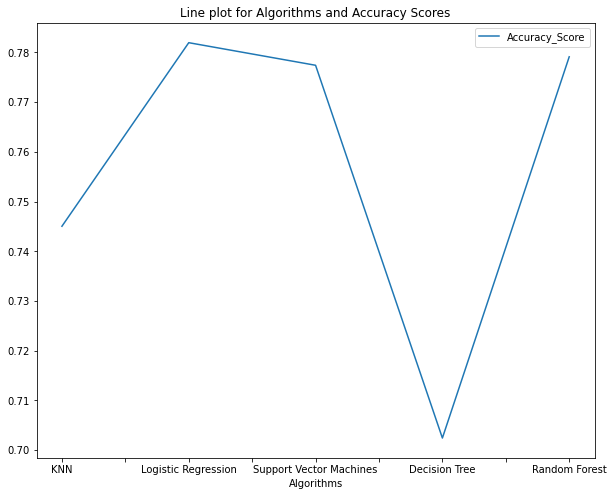

In [216]:
#from this plot we can see that which Algorithm having high score
AccuracyScores_Algo.plot(x='Algorithms', y='Accuracy_Score',kind="line", figsize=(10,8),title='Line plot for Algorithms and Accuracy Scores')
plt.plot()  

**Logistic Regression is the best algorithm for Churn Analysis(0.782% Accuracy Score)**